In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# **Homework**

dataset:

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")
print(f"Num rows: {data.shape[0]}, Number of cols: {data.shape[1]}")

Num rows: 2160, Number of cols: 12


In [3]:
data.sample(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
111,Lenovo IdeaPad 3 15ALC6 AMD Ryzen 3 5300U/8GB/...,New,Lenovo,IdeaPad,AMD Ryzen 3,8,256,SSD,NaN,15.6,No,459.00
129,MSI Pulse GL76 12UEK-828XES Intel Core i7-1270...,New,MSI,Pulse,Intel Core i7,32,1000,SSD,RTX 3060,17.3,No,1499.00
1428,HP Chromebook X360 11 G3 Intel Celeron N4020/4...,New,HP,Chromebook,Intel Celeron,4,32,eMMC,NaN,11.6,Yes,332.41
1439,HP EliteBook 850 G8 Intel Core i5-1135G7/8GB/2...,New,HP,EliteBook,Intel Core i5,8,256,SSD,NaN,15.6,No,1015.01
749,PcCom Revolt 4050 Intel Core i5-13500H/16GB/50...,New,PcCom,Revolt,Intel Core i5,16,500,SSD,RTX 4050,15.6,No,1479.90
1540,Lenovo ThinkPad L13 Yoga Gen 3 Intel Core i5-1...,New,Lenovo,ThinkPad,Intel Core i5,8,256,SSD,NaN,13.3,Yes,1329.00
999,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,14.0,No,339.00
827,MSI Stealth 15 A13VF-060XES Intel Core i7-1362...,New,MSI,Stealth,Intel Core i7,32,1000,SSD,RTX 4060,15.6,No,2184.41
1780,Asus ROG G513QM-HF246 AMD Ryzen 7 5800H/16GB/1...,Refurbished,Asus,ROG,AMD Ryzen 7,16,1000,SSD,RTX 3060,15.6,No,1183.68
1794,Asus Rog Strix G15 G513QR-HF120 AMD Ryzen 7 58...,Refurbished,Asus,ROG,AMD Ryzen 7,32,1000,SSD,RTX 3070,15.6,No,1397.54


## **Preparing the dataset**

In [4]:
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.columns.to_list()

['laptop',
 'status',
 'brand',
 'model',
 'cpu',
 'ram',
 'storage',
 'storage_type',
 'gpu',
 'screen',
 'touch',
 'final_price']

In [5]:
working_cols = ['ram','storage', 'screen', 'final_price']

In [6]:
df = data[working_cols]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


## **EDA**

Text(0.5, 1.0, 'Final price distribution')

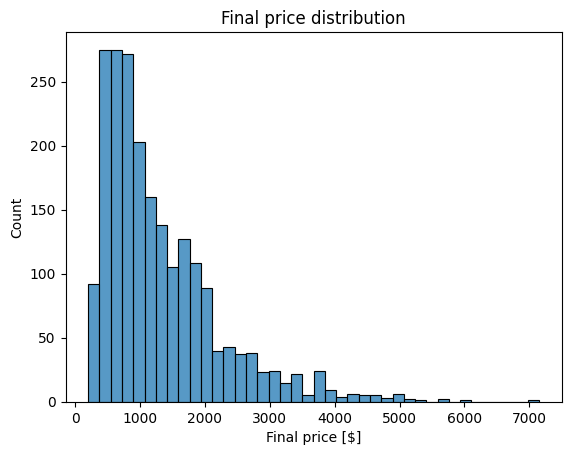

In [7]:
sns.histplot(df['final_price'], bins=40)
plt.xlabel("Final price [$]")
plt.title("Final price distribution")

In [8]:
missing_values = df.isnull().sum()

columns_with_missing = missing_values[missing_values > 0]

# Print columns with missing values and their counts
print(columns_with_missing)

screen    4
dtype: int64


In [9]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


## **Splitting the dataset:**

In [10]:
def split_dataset(df, seed = 42):
    np.random.seed(seed)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df)


## **Linear Regression models**

In [11]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [12]:
def prepare_X(df, filling_value = 0):
    df_num = df.copy()
    df_num = df_num.fillna(filling_value)
    X = df_num.values
    return X

Let's start with a first base model using 0 to fill the missing values:

In [13]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

Let's create a second model using the mean to fill the missing values:

In [14]:
screen_mean = df_train['screen'].mean()
screen_mean

15.163534416086618

In [15]:
X_train_v2 = prepare_X(df_train, screen_mean)
w_0_v2, w_v2 = train_linear_regression(X_train_v2, y_train)
y_pred_v2 = w_0_v2 + X_train_v2.dot(w_v2)

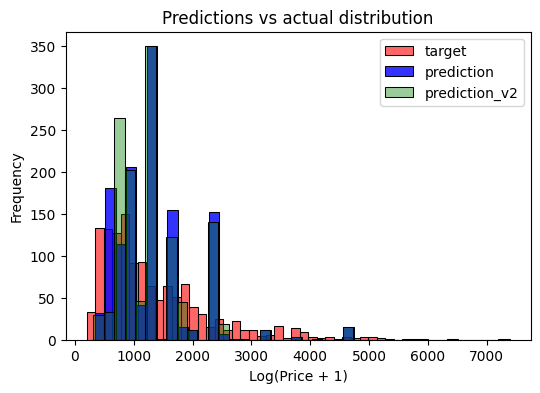

In [16]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)
sns.histplot(y_pred_v2, label='prediction_v2', color='green', alpha=0.4, bins=40)

plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [17]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [18]:
rmse_1 = rmse(y_train, y_pred)
rmse_2 = rmse(y_train, y_pred_v2)

In [19]:
print(f"Training Metrics: model with filling value = 0, {round(rmse_1, 2)}")
print(f"Training Metrics: model with filling value = mean, {round(rmse_2, 2)}")

Training Metrics: model with filling value = 0, 602.39
Training Metrics: model with filling value = mean, 602.18


Checking with the validation set:

In [20]:
X_val_v1 = prepare_X(df_val)
y_pred_val_1 = w_0 + X_val_v1.dot(w)

In [21]:
X_val_v2 = prepare_X(df_val, screen_mean)
y_pred_val_2 = w_0_v2 + X_val_v2.dot(w_v2)

In [22]:
val_rmse_1 = rmse(y_val, y_pred_val_1)
val_rmse_2 = rmse(y_val, y_pred_val_2)

In [23]:
print(f"validation Metrics: model with filling value = 0, {round(val_rmse_1, 2)}")
print(f"validation Metrics: model with filling value = mean, {round(val_rmse_2, 2)}")

validation Metrics: model with filling value = 0, 597.36
validation Metrics: model with filling value = mean, 600.27


## **Regularized model**

Now let's train a regularized linear regression model:

In [24]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [35]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    w_0_, w_ = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0_ + X_val.dot(w_)
    print(f"r = {r}, validation RMSE = {round(rmse(y_val, y_pred), 2)}")

r = 0, validation RMSE = 576.1
r = 0.01, validation RMSE = 576.1
r = 0.1, validation RMSE = 576.12
r = 1, validation RMSE = 576.3
r = 5, validation RMSE = 577.22
r = 10, validation RMSE = 578.1
r = 100, validation RMSE = 580.89


### Let's find out how selecting the seed influences our score:

In [26]:
seed_values = list(range(10))
seed_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [27]:
rmse_scores = []

for seed in seed_values:
    # split the data
    df_train, df_val, _, y_train, y_val, _ = split_dataset(df, seed=seed)
    
    #prepare the dataset, filling value 0
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    
    # Train an unregularized model
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred_ = w_0 + X_val.dot(w)
    rmse_score = rmse(y_val, y_pred_)
    rmse_scores.append(rmse_score)
    print(f"seed = {seed}, Validation RMSE: {rmse_score}")

seed = 0, Validation RMSE: 565.4520868770992
seed = 1, Validation RMSE: 636.7985423056716
seed = 2, Validation RMSE: 588.9558697907979
seed = 3, Validation RMSE: 597.8148920012542
seed = 4, Validation RMSE: 571.9627915111046
seed = 5, Validation RMSE: 573.2383256618959
seed = 6, Validation RMSE: 647.3438328407311
seed = 7, Validation RMSE: 550.4398184485875
seed = 8, Validation RMSE: 587.333503616987
seed = 9, Validation RMSE: 576.1017929433077


In [28]:
round(np.std(rmse_scores), 3)

29.176

Question 6:

In [29]:
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, seed=9)

In [30]:
train_data = pd.concat([df_train, df_val], ignore_index=True)

In [31]:
train_y = np.concatenate([y_train, y_val])

In [32]:
X_train_v3 = prepare_X(train_data)
X_test = prepare_X(df_test)

In [33]:
w_0_v3, w_v3 = train_linear_regression_reg(X_train_v3, train_y, 0.001)

In [34]:
y_pred_test = w_0_v3 + X_test.dot(w_v3)
print(f"Test RMSE = {round(rmse(y_test, y_pred_test), 2)}")

Test RMSE = 608.61
